<a href="https://colab.research.google.com/github/Betinsss/CSST101-3A/blob/main/Notebooks/3A-LAT-EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementation of Bayesian Networks in Google Colab**

##**Exercise 1: Setting Up the Environment**



**1. Install the Required Library:**

In [ ]:
!pip install pgmpy


**2. Import Libraries:**

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation


##**Exercise 2: Building a Simple Bayesian Network**

**1. Define the Structure:**

In [ ]:
# Define the Bayesian Network structure
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])


**2. Define Conditional Probability Tables (CPTs):**

In [ ]:
# CPD for Weather: P(Weather)
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.7], [0.3]],
                         state_names={'Weather': ['Sunny', 'Rainy']})

# CPD for Traffic: P(Traffic | Weather)
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.8, 0.4], [0.2, 0.6]],
                         evidence=['Weather'], evidence_card=[2],
                         state_names={'Traffic': ['Light', 'Heavy'], 'Weather': ['Sunny', 'Rainy']})

# CPD for Late: P(Late | Traffic)
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.9, 0.3], [0.1, 0.7]],
                      evidence=['Traffic'], evidence_card=[2],
                      state_names={'Late': ['On Time', 'Late'], 'Traffic': ['Light', 'Heavy']})

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Verify if the model is valid
assert model.check_model()


##**Exercise 3: Querying the Bayesian Network**

**1. Perform Exact Inference:**

In [ ]:
# Perform inference
inference = VariableElimination(model)

# Query: P(Late | Weather=Rainy)
result = inference.query(variables=['Late'], evidence={'Weather': 'Rainy'}) # Use 'Rainy' instead of 1
print(result)

+---------------+-------------+
| Late          |   phi(Late) |
+===============+=============+
| Late(On Time) |      0.5400 |
+---------------+-------------+
| Late(Late)    |      0.4600 |
+---------------+-------------+


##**Exercise 4: Parameter Learning**


**1. Simulate a Dataset:**

In [ ]:
data = pd.DataFrame(data={'Weather': np.random.choice(['Sunny', 'Rainy'], size=1000, p=[0.7, 0.3]),
                          'Traffic': np.random.choice(['Light', 'Heavy'], size=1000, p=[0.6, 0.4]),
                          'Late': np.random.choice(['On Time', 'Late'], size=1000, p=[0.8, 0.2])})


In [ ]:

# Create a synthetic dataset # for Sunny, 1 for Rainy
data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]), 'Traffic': np.nan,
    'Late': np.nan
})
# Fill Traffic based on Weather
data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
      [0, 1],
      size=data[data['Weather']== 0].shape[0],
      p=[0.9, 0.1]
)
data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
      [0, 1],
      size=data[data['Weather']==1].shape[0],
      p=[0.5, 0.5]
)
# Fill Late based on Traffic
data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

**2. Estimate the Parameters:**


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Create a new model with the same structure
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Estimate the CPDs from the data
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print learned CPDs
for cpd in model.get_cpds():
    print(cpd)


+------------+-------+
| Weather(0) | 0.795 |
+------------+-------+
| Weather(1) | 0.205 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.8968553459119497  | 0.47804878048780486 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.10314465408805032 | 0.5219512195121951  |
+--------------+---------------------+---------------------+
+---------+---------------------+---------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)        |
+---------+---------------------+---------------------+
| Late(0) | 0.9395807644882861  | 0.41798941798941797 |
+---------+---------------------+---------------------+
| Late(1) | 0.06041923551171394 | 0.582010582010582   |
+---------+---------------------+---------------------+


##**Exercise 5: Visualizing the Bayesian Networkt**

**1. Visualize the Network Structure:**


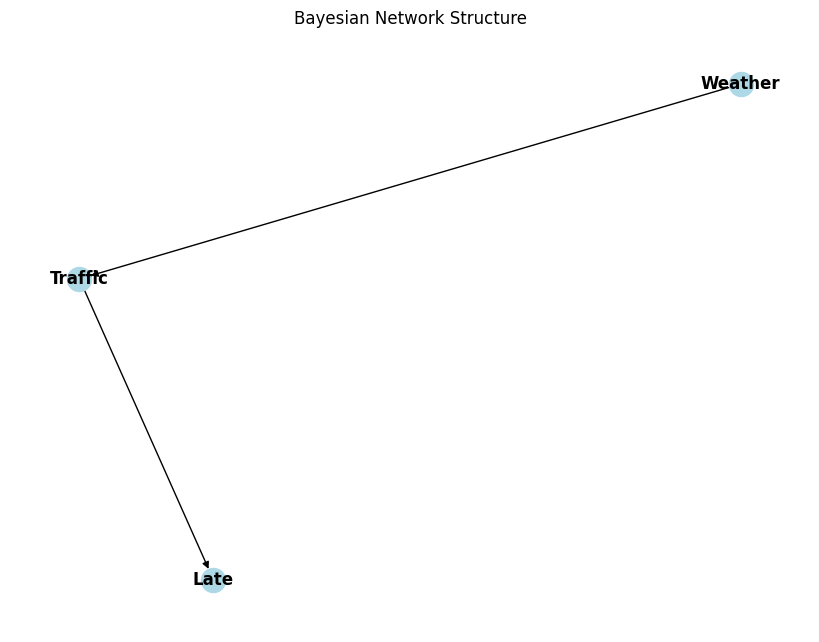

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a NetworkX graph from the Bayesian Network
nx_graph = nx.DiGraph()

# Add nodes
for cpd in model.get_cpds():
    nx_graph.add_node(cpd.variable)

# Add edges based on the structure of the Bayesian Network
for parent, child in model.edges():
    nx_graph.add_edge(parent, child)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)  # Define the layout for the nodes
nx.draw(
    nx_graph, pos,
    with_labels=True,
    node_color='lightblue',
    font_weight='bold',
    arrows=True
)
plt.title('Bayesian Network Structure')
plt.show()
